In [54]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
import unicodedata

In [4]:
with open('datatran2024.csv', 'rb') as f:
    result = chardet.detect(f.read(10000)) 
    encoding_detected = result['encoding']

print(f"Codificação detectada: {encoding_detected}")

Codificação detectada: ISO-8859-1


In [7]:
df = pd.read_csv('datatran2024.csv', encoding='ISO-8859-1', sep=';', on_bad_lines='skip')

In [49]:
df

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,hora
0,571789.0,2024-01-01,segunda-feira,1900-01-01 03:00:00,ES,101,38,CONCEICAO DA BARRA,Ultrapassagem Indevida,Colisão lateral sentido oposto,...,1,1,1,3,"-18,48261","-39,92379",SPRF-ES,DEL04-ES,UOP02-DEL04-ES,3
1,571804.0,2024-01-01,segunda-feira,1900-01-01 04:00:00,PI,343,185,PIRIPIRI,Manobra de mudança de faixa,Colisão frontal,...,1,0,0,2,"-4,29603281","-41,76732659",SPRF-PI,DEL02-PI,UOP01-DEL02-PI,4
2,571806.0,2024-01-01,segunda-feira,1900-01-01 04:00:00,BA,116,578,BREJOES,Ingestão de álcool pelo condutor,Colisão frontal,...,1,2,0,4,"-13,07158302","-39,9611107",SPRF-BA,DEL03-BA,UOP02-DEL03-BA,4
3,571818.0,2024-01-01,segunda-feira,1900-01-01 06:00:00,SE,101,18,MALHADA DOS BOIS,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,...,0,2,1,3,"-10,35601949","-36,90552235",SPRF-SE,DEL02-SE,UOP02-DEL02-SE,6
4,571838.0,2024-01-01,segunda-feira,1900-01-01 05:00:00,MT,364,240,RONDONOPOLIS,Condutor deixou de manter distância do veículo...,Colisão traseira,...,2,1,0,3,"-16,17914141","-54,78905337",SPRF-MT,DEL02-MT,UOP01-DEL02-MT,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47698,627756.0,2024-08-20,terça-feira,1900-01-01 17:00:00,MG,116,"13,6",AGUAS VERMELHAS,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,...,0,0,1,1,"-15,804386","-41,359894",SPRF-BA,DEL08-BA,UOP03-DEL08-BA,17
47699,627773.0,2024-06-01,sábado,1900-01-01 19:00:00,MG,116,422,ALPERCATA,Animais na Pista,Atropelamento de Animal,...,0,0,1,1,"-18,95287041","-41,95682514",SPRF-MG,DEL06-MG,UOP01-DEL06-MG,19
47700,627777.0,2024-08-07,quarta-feira,1900-01-01 18:00:00,RS,116,234,ESTANCIA VELHA,Acesso irregular,Colisão transversal,...,2,0,0,2,"-29,65121313","-51,1444433",SPRF-RS,DEL01-RS,UOP02-DEL01-RS,18
47701,627911.0,2024-08-29,quinta-feira,1900-01-01 07:00:00,MG,40,515,RIBEIRAO DAS NEVES,Condutor deixou de manter distância do veículo...,Engavetamento,...,1,0,2,3,"-19,8090079","-44,09493479",SPRF-MG,DEL01-MG,UOP02-DEL01-MG,7


In [ ]:
df.info()

    uf  numero_acidentes
10  MG              6012
23  SC              5511
17  PR              4888
18  RJ              4090
22  RS              3430
25  SP              3176
4   BA              2726
8   GO              2208
15  PE              2140
12  MT              1682
7   ES              1584
14  PB              1235
11  MS              1193
19  RN              1035
20  RO               988
16  PI               959
5   CE               944
9   MA               729
6   DF               711
13  PA               625
26  TO               509
1   AL               462
24  SE               388
0   AC               188
2   AM               107
3   AP               100
21  RR                83


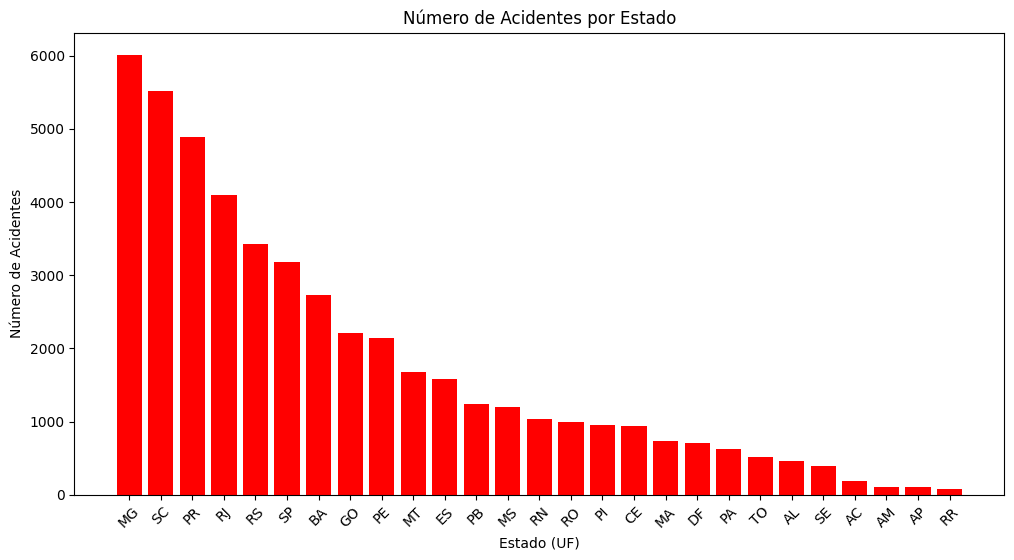

In [26]:
acidentes_por_estado = df.groupby('uf').size().reset_index(name='numero_acidentes').sort_values(by='numero_acidentes', ascending=False)
print(acidentes_por_estado)
plt.figure(figsize=(12, 6))
plt.bar(acidentes_por_estado['uf'], acidentes_por_estado['numero_acidentes'], color='red')
plt.title('Número de Acidentes por Estado')
plt.xlabel('Estado (UF)')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=45) 
plt.show()

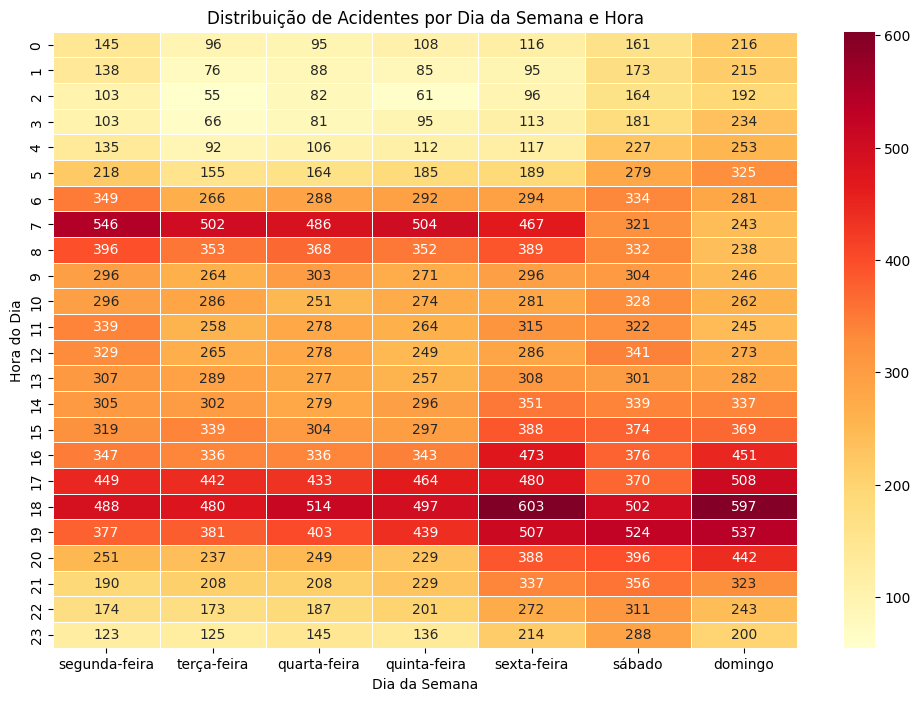

In [40]:
df['horario'] = pd.to_datetime(df['horario'], format='%H:%M:%S').dt.floor('h')
acidentes_pivot = df.pivot_table(index='hora', columns='dia_semana', aggfunc='size', fill_value=0)
dias_ordenados = ['segunda-feira', 'terça-feira', 'quarta-feira', 'quinta-feira', 'sexta-feira', 'sábado', 'domingo']
acidentes_pivot = acidentes_pivot[dias_ordenados]

plt.figure(figsize=(12, 8))
#cmap: Paleta de cores
#annot: Adiciona os valores de cada célula diretamente no gráfico
#fmt: Valores inteiros
#linewidths: Larguras linhas
sns.heatmap(acidentes_pivot, cmap='YlOrRd', annot=True, fmt='d', linewidths=.5)
plt.title('Distribuição de Acidentes por Dia da Semana e Hora')
plt.xlabel('Dia da Semana')
plt.ylabel('Hora do Dia')
plt.show()

                                       causa_acidente  numero_acidentes
51           Reação tardia ou ineficiente do condutor              7172
8                      Ausência de reação do condutor              6917
0   Acessar a via sem observar a presença dos outr...              4567
14  Condutor deixou de manter distância do veículo...              2952
39                        Manobra de mudança de faixa              2763
67                            Velocidade Incompatível              2721
37                   Ingestão de álcool pelo condutor              2503
23               Demais falhas mecânicas ou elétricas              2244
63                             Transitar na contramão              1621
13                                  Condutor Dormindo              1392


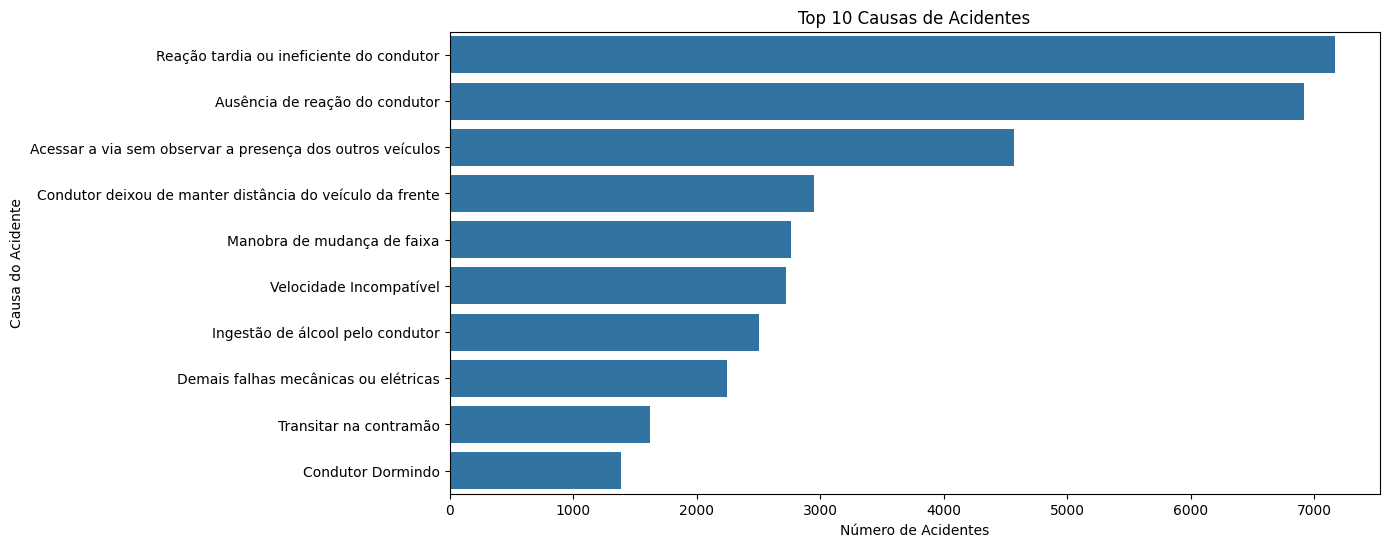

In [48]:
frequencia_causas = df.groupby('causa_acidente').size().reset_index(name='numero_acidentes')
frequencia_causas = frequencia_causas.sort_values(by='numero_acidentes', ascending=False)
print(frequencia_causas.head(10))
plt.figure(figsize=(12, 6))
sns.barplot(x='numero_acidentes', y='causa_acidente', data=frequencia_causas.head(10))
plt.title('Top 10 Causas de Acidentes')
plt.xlabel('Número de Acidentes')
plt.ylabel('Causa do Acidente')
plt.show()
